In [44]:
import pathlib
import pickle
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

In [135]:
path = sorted([f for f in pathlib.Path(r'C:\Users\water\Desktop\WF\WholeFoods-Datascraping-Project-Deployment\Deployment\scraped products dump').glob("*.pkl")], key=lambda f: f.stat().st_mtime, reverse=True)
with open(str(path[0]), 'rb') as handle:                        
    df = pickle.load(handle)

-------------------

In [103]:
df = pd.read_csv(r'C:\Users\water\Downloads\WF_Sales_Mar_02_2022_Decatur_GA_30033.csv').drop(columns='Unnamed: 0')

In [104]:
original_df = df.copy()

In [105]:
if any(df['product'].str.contains(',')): # clean all products to remove text after commas ||for example (product, 8 oz) (, 8oz) gets removed||
    ix = df[df['product'].str.contains(',')].index # this is done to optimize word embedding/parsing 
    for i in range(len(ix)):
        df.loc[ix[i], 'product'] = ','.join(df.loc[ix[i], 'product'].split(',')[:-1])
#############################################################################
nlp = spacy.load('en_core_web_lg') # load pretrained model & Add stop words to optimize parsing
nlp.Defaults.stop_words |= {"2pk","3pk","4pk","5pk","6pk","7pk","8pk","9pk","10pk","11pk","12pk","14pk","20ct","5ct","6ct","B.","C","B12","%"," 1L","yd","sal","oz","cup","M", "8ct"} 
#############################################################################
# Create parser to extract product items "PROPN"
# we will find the proper noun token with fewest heads as the top level proper noun
# if no proper noun is found, we will designate `MISC`. function provided by https://github.com/ianyu93 
def parser(x): 
    # Convert text into Doc object
    doc = nlp(x) 
    dict_ = {}
    for token in doc:
        if not token.is_stop:
            # If part-of-speech tag is not proper noun or noun, skip
            if token.pos_ in ['PROPN', 'NOUN']: 
                # Collect length of dependencies
                text = token.text
                dict_[text] = []
                source = token
                while source.head != source :
                    dict_[text].append(source.text)
                    source = source.head
    if len(dict_) == 0: 
        return 'MISC'
    # Retrieve text with lowest dependencies
    return sorted([(k, v) for k, v in dict_.items()], key=lambda x: len(x[1]))[0][0]
df['parsed_product'] = df['product'].apply(lambda x: parser(x)) # apply parser to each product and output result to a new column
##############################################
# Manual Stemming / Cleaning
try:
    count_edited_values = 0
    ix = df[df['parsed_product'].str.contains('Yoghurt')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Yogurt'
    ix = df[df['parsed_product'].str.contains('Yogurts')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Yogurt'
    ix = df[df['parsed_product'].str.contains('Yoyos')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Yogurt'   
    ix = df[df['parsed_product'].str.contains('Avocados')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Avocado'   
    ix = df[df['parsed_product'].str.contains('Avacado')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Avocado' 
    ix = df[df['parsed_product'].str.contains('Almonds')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Almond' 
    ix = df[df['parsed_product'].str.contains('Bagels')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Bagel' 
    ix = df[df['parsed_product'].str.contains('Lentils')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Lentil' 
    ix = df[df['parsed_product'].str.contains('Packets')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Packet' 
    ix = df[df['parsed_product'].str.contains('Sausages')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Sausage' 
    ix = df[df['parsed_product'].str.contains('Tomatoes')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Tomato' 
    ix = df[df['parsed_product'].str.contains('Tortellni')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Tortellini' 
    ix = df[df['parsed_product'].str.contains('Tortillas')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Tortilla' 
    #
    ix = df[df['category'].str.contains('supplements')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'supplement' 
        
    ix = df[df['parsed_product'].str.contains('Zolli')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Snack' 	

    ix = df[df['parsed_product'].str.contains('Zero')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Drink' 	

    ix = df[df['company'].str.contains("GT's Synergy Kombucha")].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Kombucha' 	

    ix = df[df['company'].str.contains('Kor Shots')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Juice' 

    ix = df[df['company'].str.contains('Evolution Fresh')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Juice' 

    ix = df[df['company'].str.contains('California Olive Ranch')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Oil' 

    ix = df[df['company'].str.contains('Chobani')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Yogurt' 

    ix = df[df['company'].str.contains('Vega')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'supplement' 

    ix = df[df['company'].str.contains('WTRMLN WTR')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Juice' 

    ix = df[df['parsed_product'].str.contains('Cream')][df['category'] == 'frozen_foods'].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Ice Cream' 

    ix = df[df['product'].str.contains('Bar')][df['company'] == 'KIND Snacks'].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Bars' 

    ix = df[df['parsed_product'].str.contains('Bar')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Bars' 

    ix = df[df['product'].str.contains('Milk')][df['company'] == 'So Delicious'].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Yogurt' 

    ix = df[df['company'].str.contains('La Quercia')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Bacon'

    ix = df[df['product'].str.contains('Liquid Aminos')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Sauce'	

    ix = df[df['company'].str.contains('FROMAGER D AFFINOIS')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Cheese'

    ix = df[df['company'].str.contains('Yogi')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Tea'

    ix = df[df['company'].str.contains('North Country Smokehouse')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Bacon'

    ix = df[df['company'].str.contains('Brekki')][df['product'].str.contains('Oats')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Oats' 

    ix = df[df['company'].str.contains('Celestial Seasonings')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Tea'

    ix = df[df['company'].str.contains('Kite Hill')][df['product'].str.contains('Cheese')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Cheese' 

    ix = df[df['company'].str.contains('Icelandic Provisions')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Yogurt'
    #
    ix = df[df['company'].str.contains('Steaz')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Drink'


    ix = df[df['company'].str.contains('Ca de Ambros')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Cheese'

    ix = df[df['parsed_product'].str.contains('Tagliatelle')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Pasta'

    ix = df[df['product'].str.contains('Soup')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Soup'

    ix = df[df['parsed_product'] == 'O'].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Cereal'

    ix = df[df['parsed_product'].str.contains('Cookie')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Cookies'

    ix = df[df['parsed_product'].str.contains('Discs')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Chocolate'

    ix = df[df['parsed_product'].str.contains('Disc|Chocolate')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Chocolate'

    ix = df[df['product'].str.contains('Hummus')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Hummus'

    ix = df[df['company'].str.contains('The Good Crisp Company')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Chips'

    ix = df[df['product'].str.contains('Crisps')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Crisps'

    ix = df[df['parsed_product'].str.contains('Cracker')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Crackers'
        
    ix = df[df['parsed_product'].str.contains('Cake')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Cakes'	

    ix = df[df['company'].str.contains('PUR')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Gum'

    ix = df[df['company'].str.contains('Sesmark')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Snack'

    ix = df[df['product'].str.contains('Tilapia')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Tilapia'

    ix = df[df['product'].str.contains('Shrimp')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Shrimp'
        
    ix = df[df['product'].str.contains('Sauce')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Sauce'

    ix = df[df['product'].str.contains('Shells')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Pasta'

    ix = df[df['product'].str.contains('Penne')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Pasta'

    ix = df[df['product'].str.contains('Girasoli')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Pasta'

    ix = df[df['product'].str.contains('Ravioli')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Pasta'

    ix = df[df['product'].str.contains('Mac & Cheese')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Pasta'	

    ix = df[df['product'].str.contains('Extra Virgin Olive Oil')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Oil'

    ix = df[df['product'].str.contains('Olives')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Olives'
    ix = df[df['product'].str.contains('Chicken', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Chicken'  
    ix = df[df['product'].str.contains('Turkey', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Turkey'   
    print("Cleaned " +str(count_edited_values) + " values")
    ix = df[df['product'].str.contains('Broth')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Broth'
    ix = df[df['product'].str.contains('Marinara')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Sauce'
    ix = df[df['product'].str.contains('Juice')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Juice'

    ix = df[df['product'].str.contains('Toothpaste')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Toothpaste'	
    ix = df[df['product'].str.contains('Medium Roast|Coffee|Brew')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Coffee'

    ix = df[df['parsed_product'].str.contains('soap', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Soap'

    ix = df[df['product'].str.contains('Kombucha')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Kombucha'

    ix = df[df['company'].str.contains('Essentia')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Water'

    ix = df[df['product'].str.contains('Soap')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Soap'

    ix = df[df['company'].str.contains('AURA CACIA')][df['product'].str.contains('Oil')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Essential Oil'

    ix = df[df['product'].str.contains('noodle', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Noodles'

    ix = df[df['product'].str.contains('Cavatappi|Spaghetti')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Pasta'

    ix = df[df['product'].str.contains('Potato Chip')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Chips'
    ix = df[df['product'].str.contains('Juice')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Juice'
    ix = df[df['product'].str.contains('Soup')].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Soup'
    ix = df[df['product'].str.contains('sparkling', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Seltzer'
    ix = df[df['product'].str.contains('flatbread', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Flatbread'
    ix = df[df['category'].str.contains('desserts', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Dessert'
    ix = df[df['product'].str.contains('Bread', case=True)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Bread'    
    ix = df[df['product'].str.contains('Crisps', case=True)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Chips'    
    ix = df[df['parsed_product'].str.contains('Mix', case=True)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Snack'    
    ix = df[df['product'].str.contains('wash', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Wash'    
    ix = df[df['product'].str.contains('shampoo', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Shampoo'    
    ix = df[df['product'].str.contains('lotion', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Lotion' 
    ix = df[df['product'].str.contains('Mac & Cheese', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Pasta'    
    ix = df[df['parsed_product'] == 'Mac'].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Pasta'   
    print("Cleaned " +str(count_edited_values) + " values")
    ix = df[df['product'].str.contains('chocolate', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Chocolate'
    ix = df[df['product'].str.contains('jerky', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Jerky'
    ix = df[df['product'].str.contains('Instant Oatmeal', case=True)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Oats'
    ix = df[df['parsed_product'].str.contains('Oatmeal', case=True)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Oats'
    ix = df[df['product'].str.contains('fusilli|macaroni', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Pasta'
    ix = df[df['product'].str.contains('yogurt greek', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Yogurt'

    snack_item_list = 'Chocolate, Sauce, Bars, Gum, Chips, Jerky, Cookies, Puffs, Flatbread, Bread, Hummus, Crackers, Honey, Milk, Dip, Pretzels'.split(', ')
    ix = df[df['category'] == 'snacks_chips_salsas_dips'].index
    for i in range(len(ix)):
        count_edited_values+=1
        for snack in snack_item_list:
            if df.loc[ix[i], 'parsed_product'] not in snack_item_list:
                df.loc[ix[i], 'parsed_product'] = 'Snack'
    beauty_item_list = 'Wash, Shampoo, Conditioner, Cleanser, Balm'.split(', ')
    ix = df[df['category'] == 'beauty'].index
    for i in range(len(ix)):
        count_edited_values+=1
        for beauty in beauty_item_list:
            if df.loc[ix[i], 'parsed_product'] not in beauty_item_list:
                df.loc[ix[i], 'parsed_product'] = 'Wash'
    beverage_item_list = 'Juice, Coffee, Tea, Kombucha, Seltzer, Water, Smoothie, Lemonade, Shake'.split(', ')
    ix = df[df['category'] == 'Beverages'].index
    for i in range(len(ix)):
        count_edited_values+=1
        for beverage in beverage_item_list:
            if df.loc[ix[i], 'parsed_product'] not in beverage_item_list:
                df.loc[ix[i], 'parsed_product'] = 'Beverage'
    body_care_item_list = 'Wash, Essential Oil, Soap, Toothpaste, Shampoo, Lotion, Deodorant, Spray'.split(', ')
    ix = df[df['category'] == 'body_care'].index
    for i in range(len(ix)):
        count_edited_values+=1
        for body_care in body_care_item_list:
            if df.loc[ix[i], 'parsed_product'] not in body_care_item_list:
                df.loc[ix[i], 'parsed_product'] = 'body_care'
    ix = df[df['product'].str.contains('cookies', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Cookies'
    ix = df[df['product'].str.contains('kefir', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Kefir'
    ix = df[df['product'].str.contains('coconut milk', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Milk'
    ix = df[df['product'].str.contains('Almondmilk', case=True)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Almondmilk'
    ix = df[df['product'].str.contains('Chocolate Ice Cream|Mini Chocolate Sea Salt|Chocolate Chip Cookie Dough Ice Cream|Chocolate Chip Cookie Dough Non Dairy Frozen Dessert|Swiss Chocolate Gelato|Cornflake Chocolate Chip Marshmallow Ice Cream|Peanut Butter Chocolate Cookie Crush Ice Cream|Chocolate Fudge 4-Pack', case=True)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Ice Cream'
    ix = df[df['product'].str.contains('Chicken Meatballs', case=True)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Chicken'
    ix = df[df['product'].str.contains('Cereal', case=True)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Cereal'
    pantry_item_list = 'Chocolate, Pasta, Sauce, Snack, Soup, Cheese, Oil, Cereal, Broth, Rice, Tomato, Oats, Butter, Beans, Granola, Puffs, Seasoning, Honey, Noodles, Vinegar, Olives, Noodles, Hummus, Sweetener, Paste, Spread, Dip, Flour'.split(', ')
    ix = df[df['category'] == 'pantry_essentials'].index
    for i in range(len(ix)):
        count_edited_values+=1
        for pantry in pantry_item_list:
            if df.loc[ix[i], 'parsed_product'] not in pantry_item_list:
                df.loc[ix[i], 'parsed_product'] = 'Pantry'
    ix = df[df['product'].str.contains('Lobster Bisque|chowder|beef chili', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Soup'
    ix = df[df['product'].str.contains('Cheese|Cubes|Gouda|Cheddar|Mozzarella|Fondue|Brie|Feta|Cremeux', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Cheese'
    ix = df[df['product'].str.contains('Drink|Beverage', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Beverage'
    ix = df[df['product'].str.contains('Yogurt', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Yogurt'
    
    dairy_item_list = 'Chocolate, Beverage, Pasta, Yogurt, Cheese, Bars, Milk, Butter, Almondmilk'.split(', ')
    ix = df[df['category'] == 'dairy_eggs'].index
    for i in range(len(ix)):
        count_edited_values+=1
        for dairy in dairy_item_list:
            if df.loc[ix[i], 'parsed_product'] not in dairy_item_list:
                df.loc[ix[i], 'parsed_product'] = 'Dairy'

    frozen_item_list = 'Chocolate, Pasta, Yogurt, Broth, Bars, Chicken, Ice Cream, Dessert, Flatbread, Bread, Gelato'.split(', ')
    ix = df[df['category'] == 'frozen_foods'].index
    for i in range(len(ix)):
        count_edited_values+=1
        for frozen in frozen_item_list:
            if df.loc[ix[i], 'parsed_product'] not in frozen_item_list:
                df.loc[ix[i], 'parsed_product'] = 'Frozen'

    meat_item_list = 'Chicken, Salami, Bacon, Turkey, Ham, Pork, Steak, Bison, Lamb, Beef, Sausage, Ribs'.split(', ')
    ix = df[df['category'] == 'meat'].index
    for i in range(len(ix)):
        count_edited_values+=1
        for meat in meat_item_list:
            if df.loc[ix[i], 'parsed_product'] not in meat_item_list:
                df.loc[ix[i], 'parsed_product'] = 'Meat'
    ix = df[df['category'].str.contains('Produce', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Produce'
    ix = df[df['category'].str.contains('seafood', case=False)].index
    for i in range(len(ix)):
        count_edited_values += 1
        df.loc[ix[i], 'parsed_product'] = 'Seafood'
        

except Exception as e:
    print(e)
    print("Cleaned " +str(count_edited_values) + " values")

C:\Users\water\AppData\Local\Temp/ipykernel_26732/1271404512.py:139: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ix = df[df['parsed_product'].str.contains('Cream')][df['category'] == 'frozen_foods'].index
C:\Users\water\AppData\Local\Temp/ipykernel_26732/1271404512.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ix = df[df['product'].str.contains('Bar')][df['company'] == 'KIND Snacks'].index
C:\Users\water\AppData\Local\Temp/ipykernel_26732/1271404512.py:154: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ix = df[df['product'].str.contains('Milk')][df['company'] == 'So Delicious'].index
C:\Users\water\AppData\Local\Temp/ipykernel_26732/1271404512.py:184: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ix = df[df['company'].str.contains('Brekki')][df['product'].str.contains('Oats')].index
C:\Users\water\AppData\Local\Temp/ipykernel_26732/1271404512.py:194:

Cleaned 224 values
Cleaned 386 values


In [106]:
original_df['parsed_product'] = df['parsed_product'] # Take our parsed product column from our dataset prepped for spacy and apply it to our original dataset
                                                     # This we we keep the integrity of the product names (I.E. oz,pk,measurements of product names)

In [ ]:
original_df

In [108]:
rules.sort_values(by='')

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
20133,Candle,Candle,323,0.010706,3039,0.100733,3039,0.100733,0.106285,0.106285,1.055120
17477,Burrito,Burrito,339,0.011237,4091,0.135603,4091,0.135603,0.082865,0.082865,0.611085
11069,Gum-,Gum,382,0.012662,1218,0.040373,16540,0.548245,0.313629,0.023096,0.572060
15859,Gum,Gum-,374,0.012397,16540,0.548245,1218,0.040373,0.022612,0.307061,0.560080
16593,Shampoo,Conditioner,1573,0.052140,10898,0.361232,10296,0.341277,0.144338,0.152778,0.422936
...,...,...,...,...,...,...,...,...,...,...,...
18586,Variety,Yogurt,429,0.014220,6671,0.221121,1349976,44.747125,0.064308,0.000318,0.001437
170,Bag,Bag,8186,0.271338,420271,13.930558,420271,13.930558,0.019478,0.019478,0.001398
9464,Yogurt,Variety,393,0.013027,1349976,44.747125,6671,0.221121,0.000291,0.058912,0.001317
3757,Strawberries,Strawberries,2800,0.092811,415578,13.775001,415578,13.775001,0.006738,0.006738,0.000489


In [55]:
departments = pd.read_csv(r'C:\Users\water\Downloads\instacart-market-basket-analysis\instacart-market-basket-analysis\departments.csv')
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [117]:
orders = pd.read_csv(r'C:\Users\water\Downloads\instacart-market-basket-analysis\instacart-market-basket-analysis\order_products__prior.csv')

In [67]:
df[['product_id', 'parsed_product']]

,product_id,parsed_product
0,1,Cookies
1,2,Seasoning
2,3,Tea
3,4,Pasta
4,5,Sauce
...,...,...
40919,49682,Juice
40920,49683,Produce
40921,49685,Cranberry
40922,49686,Bread


In [46]:
orders

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [109]:
df = pd.read_csv('orders_parsed3.csv')

In [115]:
df[['product_id', 'parsed_product']]

,product_id,parsed_product
0,208,Almondmilk
1,738,Almondmilk
2,2757,Almondmilk
3,4472,Almondmilk
4,5086,Almondmilk
...,...,...
36807,49306,Yogurt
36808,49435,Yogurt
36809,49570,Yogurt
36810,49592,Yogurt


In [116]:
orders

order_id
2              Dairy
2            Produce
2          Sweetener
2                Oil
2              Snack
             ...    
3421083         Bars
3421083       Slices
3421083      Produce
3421083       Butter
3421083       Sticks
Name: item_id, Length: 30591000, dtype: object

In [118]:
test = pd.merge(orders,df[['product_id', 'parsed_product']], how='inner', on='product_id')

In [119]:
test.sort_values(by='order_id').isna().any()

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
parsed_product       False
dtype: bool

In [41]:
product = pd.read_csv(r'C:\Users\water\Downloads\instacart-market-basket-analysis\instacart-market-basket-analysis\products.csv')

In [ ]:
original_df['parsed_product'].value_counts().plot(kind = 'barh', figsize=(40,30))

In [194]:
df = pd.merge(product, aisles, how="outer", on='aisle_id')
df.rename(columns={'product_name': 'product'}, inplace=True)

In [161]:
df = pd.read_csv('orders_parsed3.csv')

In [121]:
test.parsed_product.nunique()

109

In [192]:
df = instacart

In [204]:
df = pd.merge(pd.read_csv(r'C:\Users\water\Downloads\instacart-market-basket-analysis\instacart-market-basket-analysis\order_products__prior.csv'), df, how="left", on='product_id')

In [90]:
df = pd.merge(product, aisles, how="outer", on='aisle_id')
df.dropna(inplace=True)
df = pd.merge(pd.read_csv(r'C:\Users\water\Downloads\instacart-market-basket-analysis\instacart-market-basket-analysis\order_products__prior.csv'), instacart, how="left", on='product_id')

In [122]:
orders = test.sort_values(by='order_id')

In [125]:
import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display

In [126]:
def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

In [127]:
print('orders -- dimensions: {0};   size: {1}'.format(orders.shape, size(orders)))
display(orders.head())

orders -- dimensions: (27387411, 5);   size: 2820.88 MB


,order_id,product_id,add_to_cart_order,reordered,parsed_product
0,2,33120,1,1,Dairy
170810,2,43668,9,0,Snack
168386,2,1819,8,1,Dip
167197,2,40141,7,1,Pantry
19400,2,28985,2,1,Kale


In [128]:
orders = orders.set_index('order_id')['parsed_product'].rename('item_id')
display(orders.head(10))
type(orders)

order_id
2        Dairy
2        Snack
2          Dip
2       Pantry
2         Kale
2    Sweetener
2          Oil
2    Seasoning
2      Produce
3         Milk
Name: item_id, dtype: object

pandas.core.series.Series

In [129]:
print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
      .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))

dimensions: (27387411,);   size: 1944.49 MB;   unique_orders: 3171887;   unique_items: 109


In [130]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [131]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [132]:
%%time
rules = association_rules(orders, 0.01)  

Starting order_item:               27387411
Items with support >= 0.01:             100
Remaining order_item:              27386527
Remaining orders with 2+ items:     2972381
Remaining order_item:              27187029
Item pairs:                            9698
Item pairs with support >= 0.01:       5937

Wall time: 38.9 s


In [168]:
rules.sort_values(by='confidenceAtoB', ascending=False).to_csv('rules.csv')

In [115]:
item_name = aisles.rename(columns={'aisle_id':'item_id', 'aisle':'item_name'})

In [123]:
final_df = merge_item_name(rules, item_name)

In [124]:
final_df['confidenceAtoB'] = pd.to_numeric(final_df['confidenceAtoB'])

In [1]:
import pandas as pd

In [17]:
AZ = pd.read_csv(r'C:\Users\water\Downloads\WF_Sales_Feb_26_2022_Phoenix_AZ_85016.csv').drop(columns=['Unnamed: 0'])

In [18]:
CA = pd.read_csv(r'C:\Users\water\Downloads\WF_Sales_Feb_27_2022_Santa_Monica_CA_90403.csv').drop(columns=['Unnamed: 0'])

In [19]:
PA = pd.read_csv(r'C:\Users\water\Downloads\WF_Sales_Feb_26_2022_Wayne_PA_19087 (1).csv').drop(columns=['Unnamed: 0'])

In [20]:
df = pd.concat([AZ, CA, PA], ignore_index=True)

In [21]:
df = df.drop_duplicates(subset='product')

In [30]:
instacart = pd.read_csv('orders_parsed.csv').set_index('Unnamed: 0').sort_index()
instacart.index.name = None
df = instacart.drop(columns='Unnamed: 7')

In [22]:
df

,company,product,regular,sale,prime,category,sale_discount,prime_discount,prime_sale_difference,discount_bins
0,CASA FORCELLO,"Strawberry Balsamic Compote, 4.94 oz",9.99,4.99,4.49,pantry_essentials,0.501,0.551,0.050,50% or more
1,Whole Foods Market,"Organic Dark Roast Steeped Coffee, 0.42 oz",11.99,5.99,5.39,Beverages,0.500,0.550,0.050,50% or more
2,Brekki,"Vanilla Cinnamon Overnight Oats, 5.3 oz",2.99,1.50,1.35,pantry_essentials,0.498,0.548,0.050,50% or more
3,Brekki,"Original Overnight Oats, 5.3 oz",2.99,1.50,1.35,pantry_essentials,0.498,0.548,0.050,50% or more
4,MAD HIPPIE,"Antioxidant Facial Oil, 1 each",25.99,14.49,13.04,beauty,0.442,0.498,0.056,40% to 50%
...,...,...,...,...,...,...,...,...,...,...
3447,Van Leeuwen,"Oatmilk Latte Vegan Ice Cream, 14 fl oz",7.29,6.99,6.29,frozen_foods,0.041,0.137,0.096,10% to 20%
3449,Nunez De Prado,"Organic Spanish Extra Virgin Olive Oil, 16.9 f...",13.99,13.49,12.14,pantry_essentials,0.036,0.132,0.096,10% to 20%
3453,Tom's of Maine,"Toddler Mild Fruit Training Toothpaste, 1 each",3.49,3.39,3.05,body_care,0.029,0.126,0.097,10% to 20%
3455,AVALON ORGANICS,"Scalp Treatment Tea Tree Shampoo, 11 fl oz",8.69,8.49,7.64,beauty,0.023,0.121,0.098,10% to 20%


In [35]:
df = pd.read_csv('orders_parsed3.csv')

In [36]:
df

,product_id,product,aisle_id,department_id,aisle,parsed_product
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,Cookies
1,2,All-Seasons Salt,104,13,spices seasonings,Seasoning
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,Pasta
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,Sauce
...,...,...,...,...,...,...
40919,49682,California Limeade,98,7,juice nectars,Juice
40920,49683,Cucumber Kirby,83,4,fresh vegetables,Produce
40921,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,Cranberry
40922,49686,Artisan Baguette,112,3,bread,Bread


In [98]:
df = pd.read_csv('wholefoodsorders.csv').set_index('Unnamed: 0').sort_index()
df.index.name = None
df = df.drop_duplicates(subset=['product'], keep=False)
df

,company,product,regular,sale,prime,category,sale_discount,prime_discount,prime_sale_difference,discount_bins,parsed_product
0,CASA FORCELLO,"Strawberry Balsamic Compote, 4.94 oz",9.99,4.99,4.49,pantry_essentials,0.501,0.551,0.050,50% or more,Compote
1,Whole Foods Market,"Organic Dark Roast Steeped Coffee, 0.42 oz",11.99,5.99,5.39,Beverages,0.500,0.550,0.050,50% or more,Coffee
2,Brekki,"Vanilla Cinnamon Overnight Oats, 5.3 oz",2.99,1.50,1.35,pantry_essentials,0.498,0.548,0.050,50% or more,Oats
3,Brekki,"Original Overnight Oats, 5.3 oz",2.99,1.50,1.35,pantry_essentials,0.498,0.548,0.050,50% or more,Oats
4,MAD HIPPIE,"Antioxidant Facial Oil, 1 each",25.99,14.49,13.04,beauty,0.442,0.498,0.056,40% to 50%,Oil
...,...,...,...,...,...,...,...,...,...,...,...
3447,Van Leeuwen,"Oatmilk Latte Vegan Ice Cream, 14 fl oz",7.29,6.99,6.29,frozen_foods,0.041,0.137,0.096,10% to 20%,Ice Cream
3449,Nunez De Prado,"Organic Spanish Extra Virgin Olive Oil, 16.9 f...",13.99,13.49,12.14,pantry_essentials,0.036,0.132,0.096,10% to 20%,Oil
3453,Tom's of Maine,"Toddler Mild Fruit Training Toothpaste, 1 each",3.49,3.39,3.05,body_care,0.029,0.126,0.097,10% to 20%,Toothpaste
3455,AVALON ORGANICS,"Scalp Treatment Tea Tree Shampoo, 11 fl oz",8.69,8.49,7.64,beauty,0.023,0.121,0.098,10% to 20%,Shampoo


In [ ]:
if df['product'].str.contains('Juice'):
    

<AxesSubplot:>

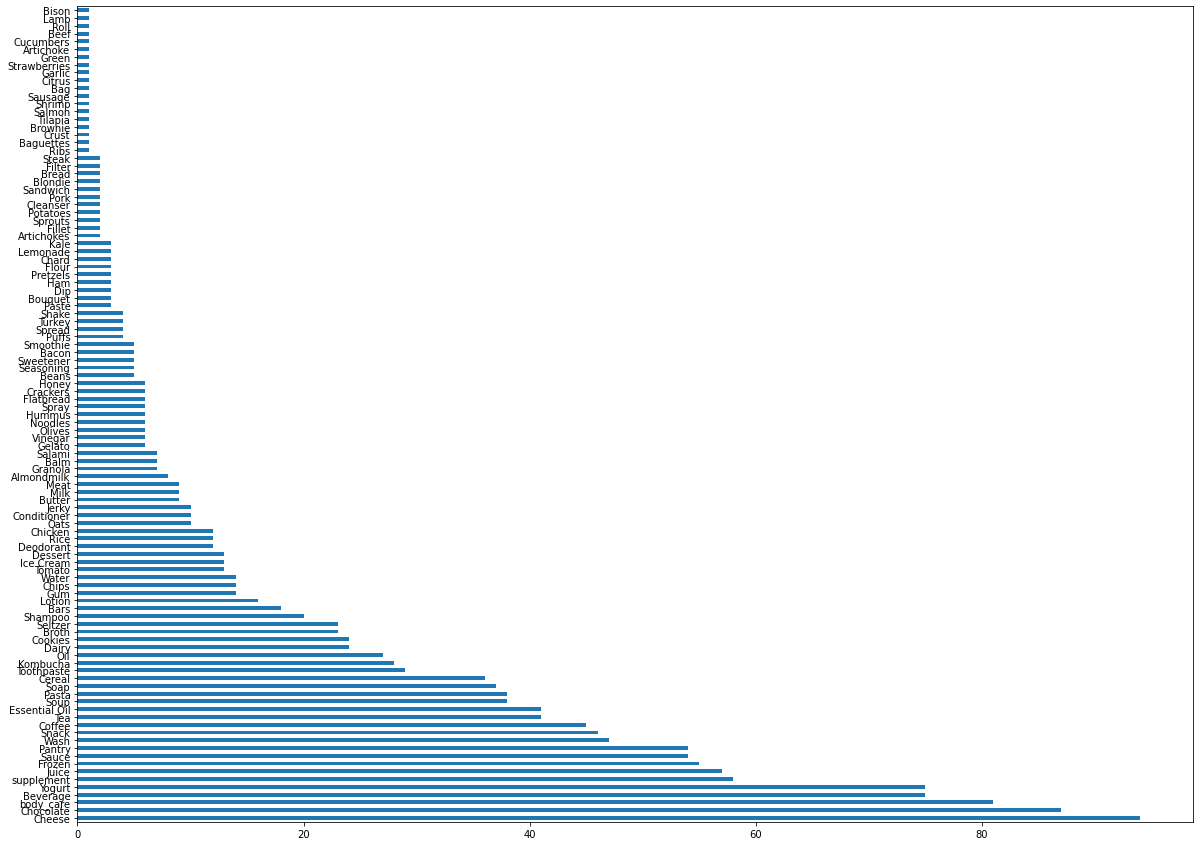

In [173]:
wf.parsed_product.value_counts().plot(kind = 'barh', figsize=(20,15))

In [169]:
Lol = pd.read_csv('orders_parsed3.csv')

<AxesSubplot:>

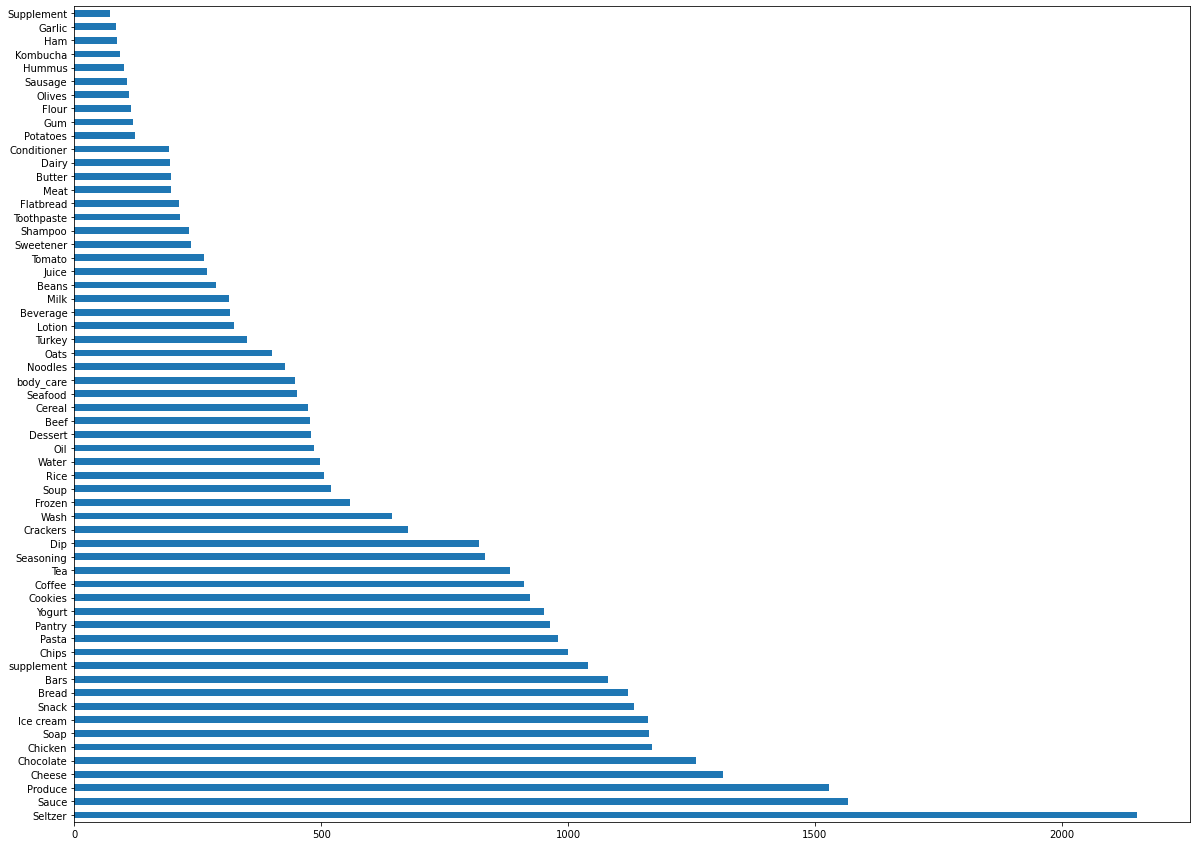

In [170]:
Lol.parsed_product.value_counts()[:60].plot(kind = 'barh', figsize=(20,15))

In [171]:
wf = pd.read_csv('wholefoodsorders4.csv')

In [198]:
hey.keys()

dict_keys(['Cheese', 'Chocolate', 'body_care', 'Beverage', 'Yogurt', 'supplement', 'Juice', 'Frozen', 'Sauce', 'Pantry', 'Wash', 'Snack', 'Coffee', 'Tea', 'Essential Oil', 'Soup', 'Pasta', 'Soap', 'Cereal', 'Toothpaste', 'Kombucha', 'Oil', 'Dairy', 'Cookies', 'Broth', 'Seltzer', 'Shampoo', 'Bars', 'Lotion', 'Gum', 'Chips', 'Water', 'Tomato', 'Ice Cream', 'Dessert', 'Deodorant', 'Rice', 'Chicken', 'Oats', 'Conditioner', 'Jerky', 'Butter', 'Milk', 'Meat', 'Almondmilk', 'Granola', 'Balm', 'Salami', 'Gelato', 'Vinegar', 'Olives', 'Noodles', 'Hummus', 'Spray', 'Flatbread', 'Crackers', 'Honey', 'Beans', 'Seasoning', 'Sweetener', 'Bacon', 'Smoothie', 'Puffs', 'Spread', 'Turkey', 'Shake', 'Paste', 'Bouquet', 'Dip', 'Ham', 'Pretzels', 'Flour', 'Chard', 'Lemonade', 'Kale', 'Artichokes', 'Fillet', 'Sprouts', 'Potatoes', 'Cleanser', 'Pork', 'Sandwich', 'Blondie', 'Bread', 'Filter', 'Steak', 'Ribs', 'Baguettes', 'Crust', 'Brownie', 'Tilapia', 'Salmon', 'Shrimp', 'Sausage', 'Bag', 'Citrus', 'Garlic'

In [231]:
len(instacart)

36812

In [234]:
instacart = pd.read_csv('orders_parsed3.csv')
hey2 = instacart['parsed_product'].value_counts().to_dict()
ratios2 = pd.DataFrame(hey2.values(), index=hey2.keys())
ratios2 = ratios2.rename(columns={0:'VC'})
ratios2['ratio'] = ratios['VC'] / 36812
ratios2.sort_values(by='ratio', ascending=False)

,VC,ratio
Cheese,1314,0.002554
Chocolate,1259,0.002363
body_care,448,0.002200
Beverage,315,0.002037
Yogurt,952,0.002037
supplement,1040,0.001576
Juice,268,0.001548
Frozen,559,0.001494
Pantry,964,0.001467
Sauce,1568,0.001467


In [218]:
hey = wf['parsed_product'].value_counts().to_dict()
ratios = pd.DataFrame(hey.values(), index=hey.keys())
ratios = ratios.rename(columns={0:'VC'})
ratios['ratio'] = ratios['VC'] / len(wf)
ratios

,VC,ratio
Cheese,94,0.056729
Chocolate,87,0.052505
body_care,81,0.048884
Beverage,75,0.045263
Yogurt,75,0.045263
supplement,58,0.035003
Juice,57,0.034400
Frozen,55,0.033193
Sauce,54,0.032589
Pantry,54,0.032589


In [68]:
df = pd.read_csv('wholefoodsorders.csv').set_index('Unnamed: 0').sort_index()
df.index.name = None
